$\theta{_j} = \theta{_j} - \alpha \frac{\partial J} {\partial \theta{}_j} (\theta{_0}, \theta{_1},...,\theta{_n})$

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
def prepare_country_stats(oecd_bli, gdp_per_capita):
    oecd_bli = oecd_bli[oecd_bli["INEQUALITY"] == "TOT"]
    oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
    gdp_per_capita.rename(columns={"2015":"GDP per capita"}, inplace=True)
    gdp_per_capita.set_index("Country", inplace=True)
    full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita,
                                 left_index = True, right_index = True)
    full_country_stats.sort_values(by="GDP per capita", inplace= True)
    remove_indices = [0,1,6,8,33,34,35]
    keep_indices = list(set(range(36)) - set(remove_indices))
    return full_country_stats[["GDP per capita","Life satisfaction"]].iloc[keep_indices]

In [5]:
# Load the data
oecd_bli = pd.read_csv("data_sets\oecd_bli_2015.csv", thousands=',')
gdp_per_capita = pd.read_csv("data_sets\gdp_per_capita.csv", thousands=",", delimiter='\t',
                            encoding='latin1', na_values="n/a")

In [6]:
# Brief description of the dataset
gdp_per_capita.head(5)

,Country,Subject Descriptor,Units,Scale,Country/Series-specific Notes,2015,Estimates Start After
0,Afghanistan,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",599.994,2013.0
1,Albania,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",3995.383,2010.0
2,Algeria,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",4318.135,2014.0
3,Angola,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",4100.315,2014.0
4,Antigua and Barbuda,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",14414.302,2011.0


In [7]:
 # Prepare the data
country_stats = prepare_country_stats(oecd_bli, gdp_per_capita)

In [8]:
# Build the pices for gradient descent
normalized_country_stats=(country_stats-country_stats.mean())/country_stats.std()
ones = np.ones((country_stats[country_stats.columns[0]].count(),1)) # Ones vector with size equal to data set rows
X = normalized_country_stats["GDP per capita"].to_frame()
# Append an extra column of ones to the fearute vector (X)
X.insert(loc=0, column='X0', value=ones)
Y = normalized_country_stats["Life satisfaction"]
alpha = 0.001 # Learning rate (gradient descent step)
m,n = X.shape
theta = np.ones(n) # Inital colomn vector of theta 
num_of_iterations = 6000

In [9]:
def cost_function(X, Y, B):
    m = len(Y)
    J = np.sum((X.dot(B) - Y) ** 2)/(2 * m)
    return J

In [10]:
# Gradient descent algoritm.
# 1) Calculate the hypothesis value for each row(B0x0 + B1x1 + B2X2 +,...+BnXn)
# 2) Calculate the loss (diference between hypothesis and y value of data set)
# 3) Gradient calculation
# 4) Add a new record of the cost
def batch_gradient_descent(x, y, theta, alpha, m, iterations_num):
    
    cost_history = [0] * iterations_num
    
    for i in range(0, iterations_num):
        # Hypothesis value
        hypotesis = np.dot(x, theta)
        #print("hypotesis: {}".format(hypotesis))
        
        # Loss
        loss = hypotesis - y
        #print("loss: {}".format(loss))
        
        # Gradient Calculation
        gradient = np.dot(np.transpose(x), loss) / m
        #print("gradient: {}".format(gradient))
        
        # Vectorization way to update theta values
        theta = theta - alpha * gradient
        #theta[0] = theta[0] - alpha * gradient[0] # Update theta0
        #theta[1] = theta[1] - alpha * gradient[1] # Update theta1
        
        # New Cost Value
        cost = cost_function(x, y, theta)
        cost_history[i] = cost
        
    return theta, cost_history

In [11]:
thetas_result, cost_history = batch_gradient_descent(X, Y, theta, alpha, m, num_of_iterations)
print(thetas_result)

[0.00247132 0.85743032]


In [12]:
# For plot purposes let's calculate all the "calculated" y for given x
y_calculated = X.dot(thetas_result)
X_for_plot = X
Y_for_plot = y_calculated

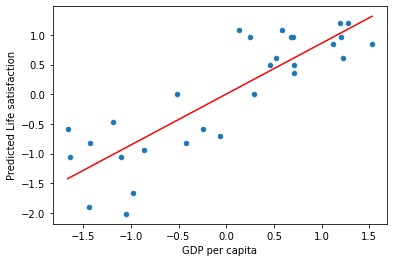

In [13]:
# Visualize our prediction line in the data set
normalized_country_stats.plot(kind="scatter", x="GDP per capita", y="Life satisfaction")
plt.plot(X_for_plot["GDP per capita"], Y_for_plot, 'r')
plt.ylabel('Predicted Life satisfaction')
plt.xlabel('GDP per capita')
plt.show()

In [14]:
def predit_value(x_new, theta):
    predicted_value = theta[0] + theta[1]*x_new
    return predicted_value

In [15]:
# Predict the output (Life satisfaction) for the X input = 22587 GDP and 40000
country_stats_mean_GDP, life_satisfaction_mean = country_stats.mean()
country_stats_std, life_satisfaction_std = country_stats.std()
print("life_satisfaction_mean {}, life_satisfaction_std: {}".format(life_satisfaction_mean, life_satisfaction_std))
print(predit_value(((22587 - country_stats_mean_GDP)/country_stats_std), thetas_result))
print(predit_value(((40000 - country_stats_mean_GDP)/country_stats_std), thetas_result))

life_satisfaction_mean 6.493103448275863, life_satisfaction_std: 0.8396134461264043
-0.62990215204203
0.38923481865121135


In [16]:
first_predicted_value = predit_value(((22587 - country_stats_mean_GDP)/country_stats_std), thetas_result)
print("first predicted value without normalization: {}".format((first_predicted_value * life_satisfaction_std) +
                                                               life_satisfaction_mean))

second_predicted_value = predit_value(((40000 - country_stats_mean_GDP)/country_stats_std), thetas_result)
print("second predicted value without normalization: {}".format((second_predicted_value * life_satisfaction_std) +
                                                               life_satisfaction_mean))

first predicted value without normalization: 5.964229131677416
second predicted value without normalization: 6.819910235715993


Text(0, 0.5, 'cost')

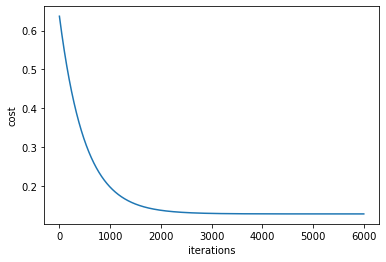

In [17]:
# Visualice the cost fuction for each iteration in the batch gradient descend algorithm
iterations = list(range(0,num_of_iterations))
plt.plot(iterations, cost_history, label='linear')  # Plot some data on the (implicit) axes.
plt.xlabel('iterations')
plt.ylabel('cost')